# Sales Analysis
### Import Necessary Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [8]:
df = pd.read_csv('Sales_Data/Sales_April_2019.csv')
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### Merge multiple CSV files into a single file

In [11]:
files = [file for file in os.listdir('Sales_Data/')]
for file in files:
    print(file)

Sales_July_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv
Sales_April_2019.csv
Sales_January_2019.csv
Sales_June_2019.csv
Sales_February_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv


In [13]:
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_month_data.to_csv('all_data.csv', index=False)

### Read in updated dataframe

In [15]:
all_data = pd.read_csv('all_data.csv')
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301"
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101"
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301"


### Clear Data

In [21]:
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Year'] = all_data['Order Date'].str[6:8]
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",07,19
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",07,19
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",07,19


#### Drop rows of NaN

In [34]:
all_data[all_data.isna().any(axis=1)].head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Drop all columns with NaN values in every fields
all_data = all_data.dropna(how='all') #'any', to drop when appears any value

In [41]:
all_data.groupby('Month').count() # We have an indesirable 'Or' in Month column. Lest delete it.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year
Month,,,,,,,
01,9709,9709,9709,9709,9709,9709,9709
02,11975,11975,11975,11975,11975,11975,11975
03,15153,15153,15153,15153,15153,15153,15153
04,18279,18279,18279,18279,18279,18279,18279
05,16566,16566,16566,16566,16566,16566,16566
06,13554,13554,13554,13554,13554,13554,13554
07,14293,14293,14293,14293,14293,14293,14293
08,11961,11961,11961,11961,11961,11961,11961
09,11621,11621,11621,11621,11621,11621,11621


In [44]:
temp_df = all_data[all_data['Order Date'].str[:2] == 'Or']  # Show all 'Or values'
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
775,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
1391,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
1438,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
1624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
1720,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
...,...,...,...,...,...,...,...,...
184506,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
185634,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
186178,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da
186449,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or,Da


In [48]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or'] # Delete every column with 'Or' value 

In [49]:
all_data['Month'] = all_data['Month'].astype('int32') # Converting Month into an int32

In [50]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,222910,Apple Airpods Headphones,1,150,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,19
1,222911,Flatscreen TV,1,300,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,19
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,19


In [51]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
Year                185950 non-null object
dtypes: int32(1), object(7)
memory usage: 12.1+ MB


In [52]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # Mmake int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Mmake float
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 8 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null int64
Price Each          185950 non-null float64
Order Date          185950 non-null object
Purchase Address    185950 non-null object
Month               185950 non-null int32
Year                185950 non-null object
dtypes: float64(1), int32(1), int64(1), object(5)
memory usage: 12.1+ MB


### Add a Total Price Column

In [53]:
all_data['Total Price'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Total Price
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,19,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,19,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,19,3.84


### Question 1: What was the best month for sales? How much was earned that month?

In [76]:
sales = all_data.groupby('Month').sum()
sales

,Quantity Ordered,Price Each,Total Price
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


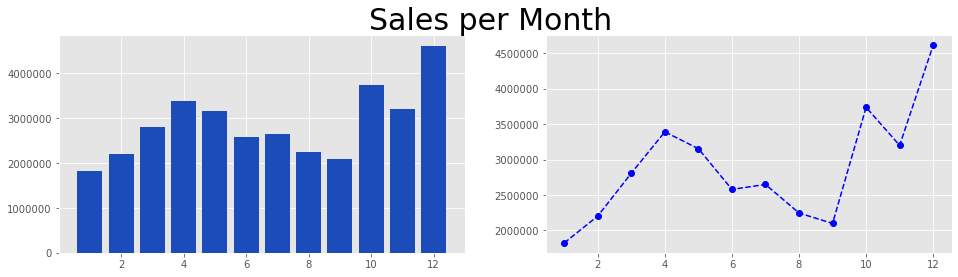

In [185]:
fig1, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,4))

x = np.arange(1,13,1)

plt.style.use('ggplot')
fig1.suptitle('Sales per Month', size=30)

ax1.bar(x, sales['Total Price'], color='#1c4bba')
ax2.plot(x, sales['Total Price'], 'b--o')
plt.show()

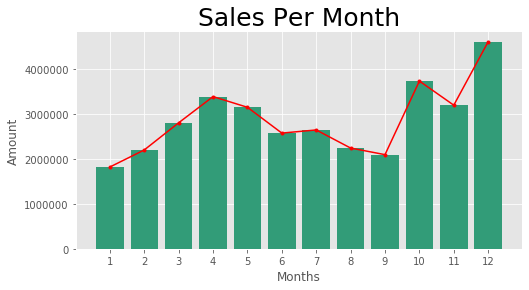

In [107]:
plt.figure(figsize=(8, 4))
months = range(1, 13)

plt.bar(months, sales['Total Price'], color='#329c78')
plt.plot(months, sales['Total Price'], 'r.-')
plt.title('Sales Per Month', fontsize=25)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()

In [140]:
sales['Total Price'].count()

12

In [157]:
x = np.arange(1,13,1)
c = 0
for i in x:
    c += 1
c

12